### What is Triage?

Triage refers to the sorting of injured or sick people according to their need for emergency medical
attention. It is a method of determining priority for who gets care first.

Triage is the prioritization of patient care (or victims during a disaster) based on illness/injury, symptoms, severity, prognosis, and resource availability. The purpose of triage is to identify patients needing immediate resuscitation; to assign patients to a predesignated patient care area, thereby prioritizing their care; and to initiate diagnostic/therapeutic measures as appropriate.

#### Triage Categories:

- Red: Needs immediate attention for a critical life-threatening injury or illness; transport first for medical help.
- Yellow: Serious injuries needing immediate attention. In some systems, yellow tags are transported first because they have a better chance of recovery than red-tagged patients.
- Green: Less serious or minor injuries, non-life-threatening, delayed transport; will eventually need help but can wait for others.
- Black: Deceased or mortally wounded; black may not mean the person has already died. It may mean that he or she is beyond help and, therefore, is a lower priority than those who can be helped.
- White: No injury or illness (not used in all systems)

<img src="https://www.disabled-world.com/pics/1/medical-triage-chart.png" alt="Triage Chart" style="width: 800px;"/>

##### Image source: [www.disabled-world.com](https://www.disabled-world.com/calculators-charts/triage.php)

#### Importing Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('data/patient_priority.csv')

In [3]:
df.head()

,Unnamed: 0,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type,smoking_status,triage
0,0,40.0,1.0,2.0,140.0,294.0,172.0,0.0,108.0,43.0,92.0,19.0,0.467386,0.0,0.0,Urban,never smoked,yellow
1,1,49.0,0.0,3.0,160.0,180.0,156.0,0.0,75.0,47.0,90.0,18.0,0.467386,0.0,0.0,Urban,never smoked,orange
2,2,37.0,1.0,2.0,130.0,294.0,156.0,0.0,98.0,53.0,102.0,23.0,0.467386,0.0,0.0,Urban,never smoked,yellow
3,3,48.0,0.0,4.0,138.0,214.0,156.0,1.0,72.0,51.0,118.0,18.0,0.467386,0.0,0.0,Urban,never smoked,orange
4,4,54.0,1.0,3.0,150.0,195.0,156.0,0.0,108.0,90.0,83.0,21.0,0.467386,0.0,0.0,Urban,never smoked,yellow


In [4]:
df.shape

(6962, 18)

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df.columns

Index(['age', 'gender', 'chest pain type', 'blood pressure', 'cholesterol',
       'max heart rate', 'exercise angina', 'plasma glucose', 'skin_thickness',
       'insulin', 'bmi', 'diabetes_pedigree', 'hypertension', 'heart_disease',
       'Residence_type', 'smoking_status', 'triage'],
      dtype='object')

In [7]:
df.shape

(6962, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6962 entries, 0 to 6961
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                6962 non-null   float64
 1   gender             6961 non-null   float64
 2   chest pain type    6962 non-null   float64
 3   blood pressure     6962 non-null   float64
 4   cholesterol        6962 non-null   float64
 5   max heart rate     6962 non-null   float64
 6   exercise angina    6962 non-null   float64
 7   plasma glucose     6962 non-null   float64
 8   skin_thickness     6962 non-null   float64
 9   insulin            6962 non-null   float64
 10  bmi                6962 non-null   float64
 11  diabetes_pedigree  6962 non-null   float64
 12  hypertension       6962 non-null   float64
 13  heart_disease      6962 non-null   float64
 14  Residence_type     6962 non-null   object 
 15  smoking_status     6962 non-null   object 
 16  triage             6552 

In [9]:
df.describe()

,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease
count,6962.000000,6961.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000
mean,57.450014,0.531964,0.529015,109.629991,184.711290,163.502442,0.061764,98.394283,56.813416,111.091640,27.190908,0.467386,0.071531,0.039500
std,11.904948,0.499013,1.253791,21.534852,32.010359,15.458693,0.240743,28.598084,22.889316,17.470033,7.362886,0.102663,0.257729,0.194796
min,28.000000,0.000000,0.000000,60.000000,150.000000,138.000000,0.000000,55.120000,21.000000,81.000000,10.300000,0.078000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,92.000000,164.000000,150.000000,0.000000,78.707500,36.000000,97.000000,21.800000,0.467386,0.000000,0.000000
50%,56.000000,1.000000,0.000000,111.000000,179.000000,163.000000,0.000000,93.000000,55.000000,111.000000,26.200000,0.467386,0.000000,0.000000
75%,66.000000,1.000000,0.000000,127.000000,192.000000,177.000000,0.000000,111.632500,77.000000,125.000000,31.000000,0.467386,0.000000,0.000000
max,82.000000,1.000000,4.000000,165.000000,294.000000,202.000000,1.000000,199.000000,99.000000,171.000000,66.800000,2.420000,1.000000,1.000000


In [10]:
# plotsize
plt.rcParams["figure.figsize"] = (16, 14)

#### Histograms for all numeric features to get an idea about the distribution of features

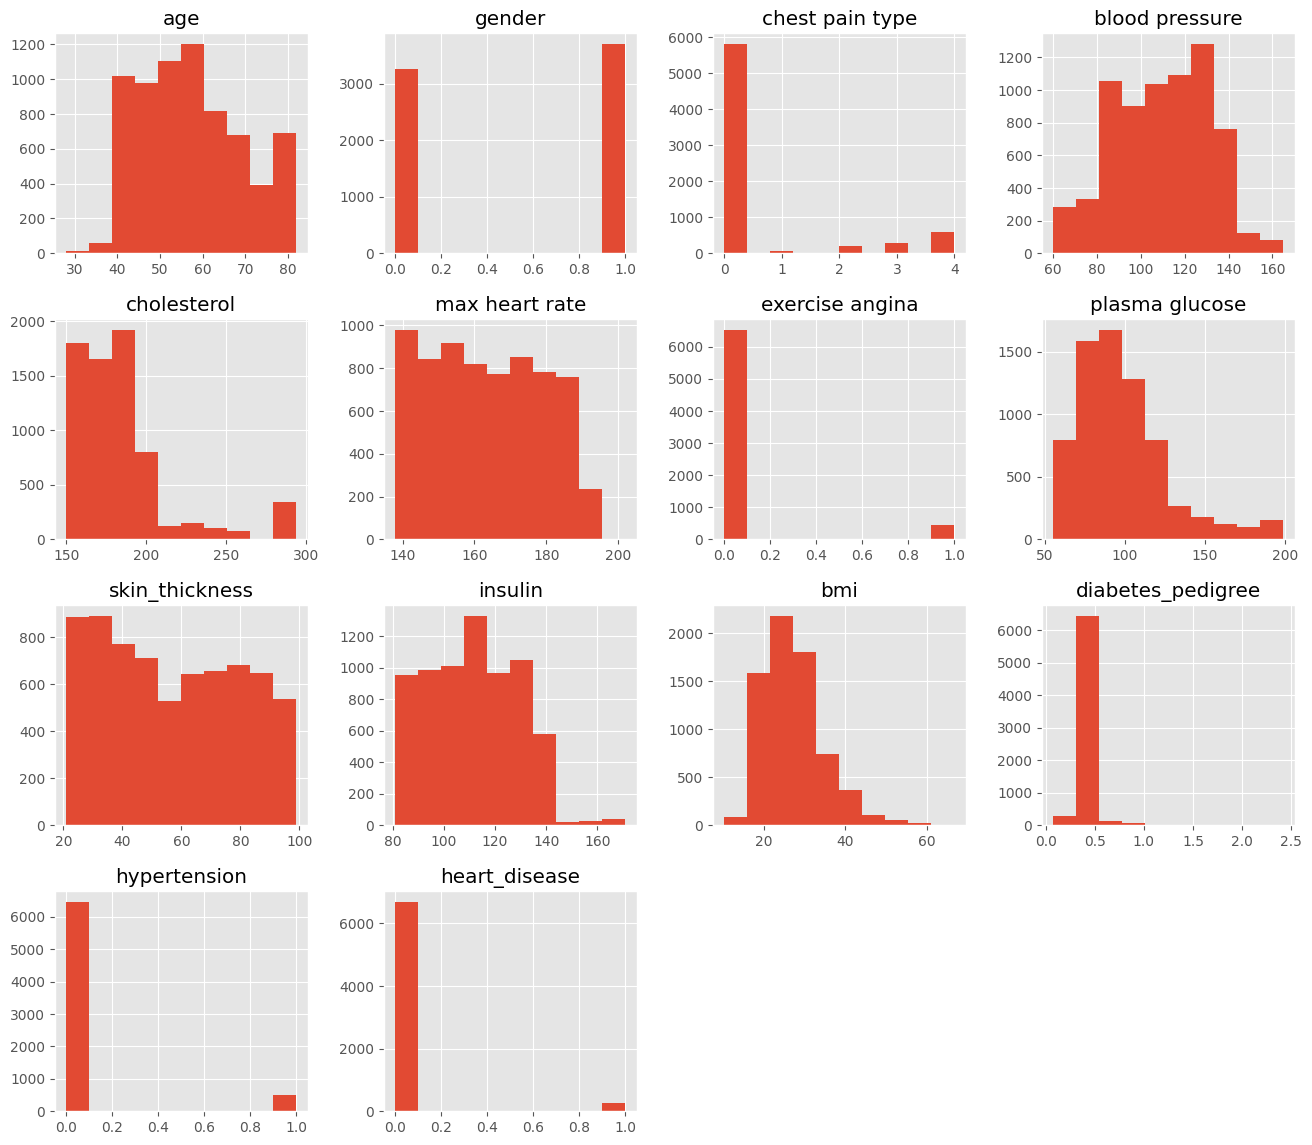

In [11]:
df.hist();

In [12]:
df.isnull().sum()

age                    0
gender                 1
chest pain type        0
blood pressure         0
cholesterol            0
max heart rate         0
exercise angina        0
plasma glucose         0
skin_thickness         0
insulin                0
bmi                    0
diabetes_pedigree      0
hypertension           0
heart_disease          0
Residence_type         0
smoking_status         0
triage               410
dtype: int64

A few rows are not having any Triage categorization so we'll be dropping them along with one row where gender is not present (because it's annoying).

In [13]:
# before
df.shape

(6962, 17)

In [14]:
df.dropna(axis=0, inplace=True)

In [15]:
# after
df.shape

(6551, 17)

We've removed 411 rows from the data since 410 of them have no purpose.

In [16]:
df.reset_index(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6551 entries, 0 to 6550
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              6551 non-null   int64  
 1   age                6551 non-null   float64
 2   gender             6551 non-null   float64
 3   chest pain type    6551 non-null   float64
 4   blood pressure     6551 non-null   float64
 5   cholesterol        6551 non-null   float64
 6   max heart rate     6551 non-null   float64
 7   exercise angina    6551 non-null   float64
 8   plasma glucose     6551 non-null   float64
 9   skin_thickness     6551 non-null   float64
 10  insulin            6551 non-null   float64
 11  bmi                6551 non-null   float64
 12  diabetes_pedigree  6551 non-null   float64
 13  hypertension       6551 non-null   float64
 14  heart_disease      6551 non-null   float64
 15  Residence_type     6551 non-null   object 
 16  smoking_status     6551 

In [18]:
df.isnull().sum()

index                0
age                  0
gender               0
chest pain type      0
blood pressure       0
cholesterol          0
max heart rate       0
exercise angina      0
plasma glucose       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
hypertension         0
heart_disease        0
Residence_type       0
smoking_status       0
triage               0
dtype: int64

#### Since there is no null values, we can proceed with feature engineering

Residence_type, smoking_status and triage have values as string. While strings are okay for some models, we'll be encoding them anyway.

In [19]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [20]:
df['smoking_status'].unique()

array(['never smoked', 'smokes', 'formerly smoked', 'Unknown'],
      dtype=object)

In [21]:
plt.rcParams["figure.figsize"] = (8, 4)

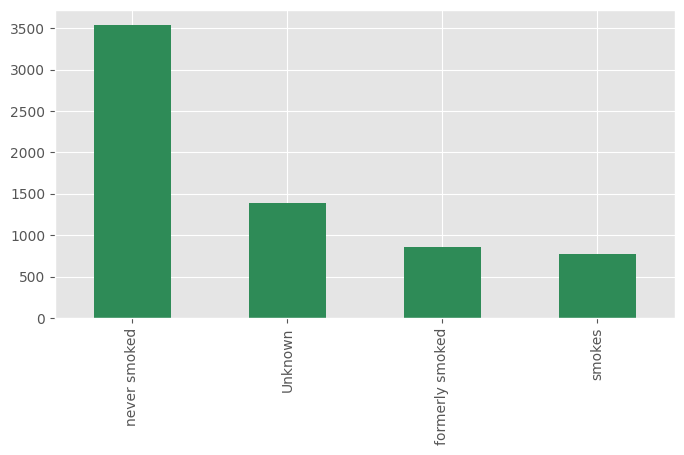

In [22]:
df['smoking_status'].value_counts().plot(kind='bar', color='seagreen');

A significant amount of data is missing here for 'Smoking Status' which is a key feature when it comes to health issues.
It is an important feature but as well as not so much related with Triage and we can't impute this using other features.

In [23]:
df['Residence_type'] = df['Residence_type'].map({'Urban':1 ,'Rural': 0})

In [24]:
df['triage'].unique()

array(['yellow', 'orange', 'red', 'green'], dtype=object)

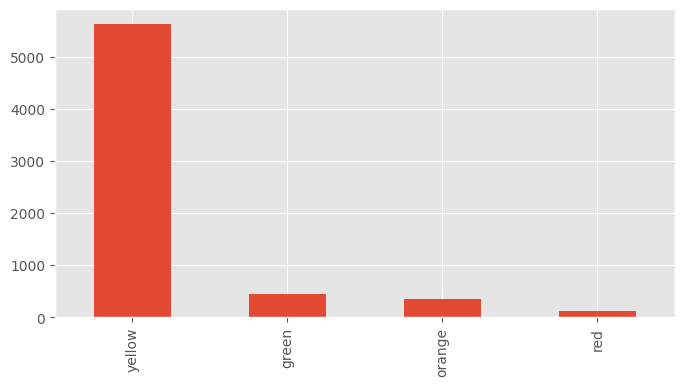

In [25]:
df['triage'].value_counts().plot(kind='bar');

In [26]:
df.columns

Index(['index', 'age', 'gender', 'chest pain type', 'blood pressure',
       'cholesterol', 'max heart rate', 'exercise angina', 'plasma glucose',
       'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree', 'hypertension',
       'heart_disease', 'Residence_type', 'smoking_status', 'triage'],
      dtype='object')

In [27]:
df.shape

(6551, 18)

In [28]:
df.head()

,index,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type,smoking_status,triage
0,0,40.0,1.0,2.0,140.0,294.0,172.0,0.0,108.0,43.0,92.0,19.0,0.467386,0.0,0.0,1,never smoked,yellow
1,1,49.0,0.0,3.0,160.0,180.0,156.0,0.0,75.0,47.0,90.0,18.0,0.467386,0.0,0.0,1,never smoked,orange
2,2,37.0,1.0,2.0,130.0,294.0,156.0,0.0,98.0,53.0,102.0,23.0,0.467386,0.0,0.0,1,never smoked,yellow
3,3,48.0,0.0,4.0,138.0,214.0,156.0,1.0,72.0,51.0,118.0,18.0,0.467386,0.0,0.0,1,never smoked,orange
4,4,54.0,1.0,3.0,150.0,195.0,156.0,0.0,108.0,90.0,83.0,21.0,0.467386,0.0,0.0,1,never smoked,yellow


### Work on numerical features

In [29]:
df['age'].unique()

array([40., 49., 37., 48., 54., 39., 45., 58., 42., 38., 43., 60., 36.,
       44., 53., 52., 51., 56., 41., 32., 65., 35., 59., 50., 47., 31.,
       46., 57., 55., 63., 66., 34., 33., 61., 29., 62., 28., 74., 68.,
       72., 64., 69., 67., 73., 70., 77., 75., 76., 71., 81., 80., 79.,
       78., 82.])

In [30]:
df['gender'].unique()

array([1., 0.])

In [31]:
df['chest pain type'].unique()

array([2., 3., 4., 1., 0.])

In [32]:
df['blood pressure'].unique()

array([140., 160., 130., 138., 150., 120., 110., 136., 115., 100., 124.,
       113., 125., 145., 112., 132., 118., 142., 135., 108., 155., 128.,
       106.,  92., 122.,  98., 105., 133.,  95.,  80., 137., 165., 126.,
       152., 116., 144., 154., 134., 104., 139., 131., 141., 146., 158.,
       123., 102.,  96., 143., 156., 114., 127., 101.,  94., 148., 117.,
       129., 164.,  66.,  74.,  72.,  84.,  70.,  88.,  90.,  76.,  82.,
        75.,  78.,  60.,  68.,  64.,  62.,  85.,  86.,  65.,  61.,  89.,
        93., 111., 107., 119.,  81.,  87., 121., 103.,  99.,  97., 109.,
        91.,  83.])

In [33]:
df['cholesterol'].unique()

array([294., 180., 214., 195., 237., 208., 207., 211., 164., 204., 234.,
       196., 201., 248., 184., 215., 209., 260., 188., 167., 224., 172.,
       186., 254., 250., 177., 227., 230., 259., 175., 223., 216., 233.,
       205., 245., 194., 213., 253., 202., 225., 246., 182., 218., 163.,
       206., 238., 229., 210., 179., 255., 156., 240., 161., 228., 241.,
       166., 247., 243., 198., 249., 168., 159., 190., 185., 212., 231.,
       222., 235., 187., 251., 192., 193., 219., 257., 226., 217., 256.,
       173., 200., 171., 160., 221., 220., 242., 169., 181., 236., 203.,
       153., 252., 258., 197., 261., 232., 170., 152., 244., 165., 239.,
       199., 178., 262., 174., 183., 157., 176., 191., 189., 154., 155.,
       151., 162., 158., 150.])

In [34]:
df['max heart rate'].unique()

array([172., 156., 170., 142., 145., 140., 150., 166., 165., 160., 164.,
       178., 154., 155., 148., 168., 184., 153., 174., 175., 144., 180.,
       152., 190., 146., 158., 176., 188., 162., 185., 167., 143., 149.,
       182., 141., 179., 157., 163., 161., 159., 151., 181., 186., 177.,
       173., 169., 171., 147., 192., 195., 194., 187., 202., 191., 189.,
       139., 138., 183.])

In [35]:
df['exercise angina'].unique()

array([0., 1.])

In [36]:
df['skin_thickness'].unique()

array([43., 47., 53., 51., 90., 49., 39., 82., 67., 37., 81., 92., 86.,
       54., 79., 64., 31., 84., 85., 78., 73., 66., 96., 74., 56., 89.,
       58., 22., 21., 34., 69., 32., 40., 72., 46., 50., 23., 27., 28.,
       35., 41., 44., 60., 57., 45., 71., 52., 62., 36., 26., 63., 68.,
       91., 98., 88., 95., 77., 65., 83., 94., 87., 93., 33., 25., 70.,
       61., 42., 55., 24., 48., 29., 97., 38., 80., 75., 30., 59., 76.,
       99.])

In [37]:
df['insulin'].unique()

array([ 92.,  90., 102., 118.,  83., 106.,  97., 103., 120., 104., 132.,
        94.,  82., 136., 105., 117., 137., 129.,  84., 113., 109.,  89.,
       111., 126.,  87.,  85., 110., 135., 122.,  98., 139., 108.,  96.,
       119., 127., 112., 124.,  81., 123., 134., 100.,  93., 114.,  88.,
       116., 133., 138., 107., 121.,  86., 125., 128., 130., 131., 115.,
       101.,  95.,  99.,  91., 168., 146., 140., 142., 152., 145., 155.,
       156., 160., 150., 148., 171., 167., 158., 165., 170., 166., 144.,
       159.])

In [38]:
df['bmi'].unique()

array([19. , 18. , 23. , 21. , 22. , 20. , 28.1, 25.6, 25.8, 30. , 29.6,
       29. , 23.2, 22.2, 24.8, 19.9, 27.6, 24. , 22.7, 27.4, 29.7, 28. ,
       19.4, 24.2, 24.4, 25. , 25.4, 19.6, 28.9, 28.6, 22.4, 29.3, 24.6,
       26.5, 19.1, 23.8, 24.7, 20.4, 28.7, 26.1, 22.5, 26.6, 29.5, 28.2,
       26.8, 27.9, 21.1, 27.3, 21.9, 25.2, 29.9, 28.4, 27.7, 22.6, 22.9,
       23.9, 28.8, 23.6, 29.2, 27.1, 25.9, 25.1, 27.5, 27.8, 24.9, 25.3,
       27. , 26. , 20.8, 25.5, 26.2, 19.3, 23.5, 23.1, 21.8, 27.2, 29.8,
       24.3, 22.3, 22.1, 26.4, 24.5, 21.2, 26.7, 26.3, 21.7, 28.5, 26.9,
       19.5, 20.1, 23.4, 28.3, 24.1, 23.3, 32.5, 34.4, 22.8, 36.8, 30.9,
       37.5, 37.8, 48.9, 44.2, 30.5, 33.7, 32. , 20.2, 33.6, 38.6, 39.2,
       31.4, 36.5, 33.2, 32.8, 40.4, 30.2, 47.5, 20.3, 31.1, 45.9, 44.1,
       29.1, 32.3, 41.1, 29.4, 34.6, 30.3, 41.5, 56.6, 31.3, 31. , 31.7,
       35.8, 38.7, 34.9, 32.9, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2, 37.1,
       45. , 30.8, 37.4, 34.5, 46. , 42.5, 35.5, 45

In [39]:
df['hypertension'].unique()

array([0., 1.])

In [40]:
df['heart_disease'].unique()

array([0., 1.])

We can convert these categories above from float to int.

In [41]:
df.drop('index', axis=1, inplace=True)

In [42]:
df = df.astype({"age":'int', "gender":'int', "chest pain type":'int', \
                "blood pressure": 'int', "cholesterol":'int', "max heart rate":'int', \
                "exercise angina":'int', "skin_thickness":'int', "insulin":'int',\
                "hypertension":'int', "heart_disease":'int', "Residence_type":'int'})

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6551 entries, 0 to 6550
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                6551 non-null   int32  
 1   gender             6551 non-null   int32  
 2   chest pain type    6551 non-null   int32  
 3   blood pressure     6551 non-null   int32  
 4   cholesterol        6551 non-null   int32  
 5   max heart rate     6551 non-null   int32  
 6   exercise angina    6551 non-null   int32  
 7   plasma glucose     6551 non-null   float64
 8   skin_thickness     6551 non-null   int32  
 9   insulin            6551 non-null   int32  
 10  bmi                6551 non-null   float64
 11  diabetes_pedigree  6551 non-null   float64
 12  hypertension       6551 non-null   int32  
 13  heart_disease      6551 non-null   int32  
 14  Residence_type     6551 non-null   int32  
 15  smoking_status     6551 non-null   object 
 16  triage             6551 

#### Checking Correlations

In [44]:
plt.rcParams["figure.figsize"] = (10, 7)

In [45]:
corr = df.corr(method='pearson')

C:\Users\rick\AppData\Local\Temp\ipykernel_14656\1193077595.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='pearson')


In [46]:
triu = np.triu(corr)
np.fill_diagonal(triu, False)

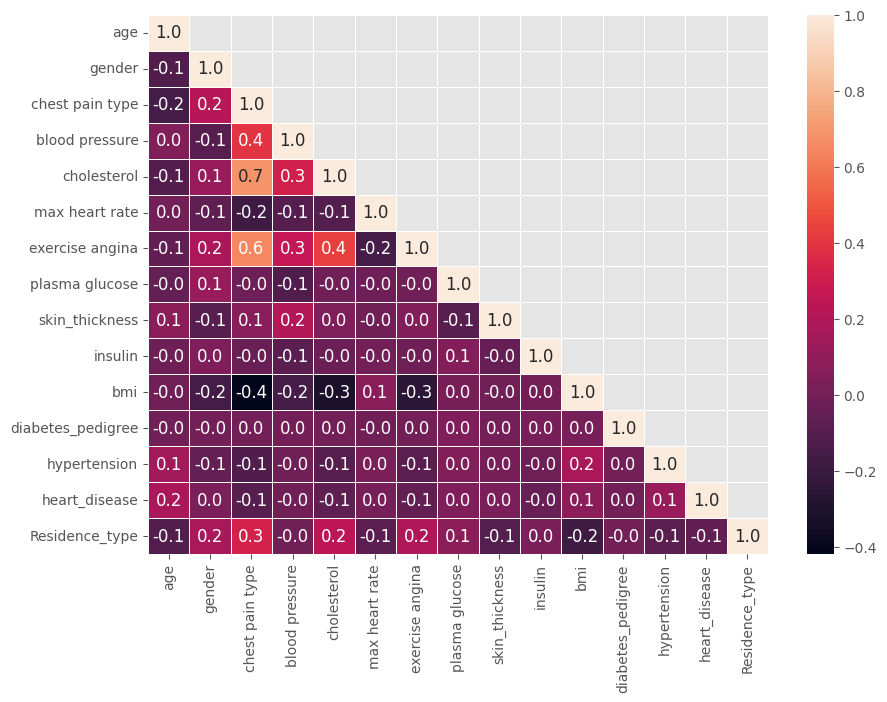

In [47]:
sns.heatmap(corr, annot=True, fmt='.1f',annot_kws={"size":12}, linewidth=.6, mask=triu);

Here we can see the following.

- There is a moderate correlation between chest pain type and cholesterol. Provided the feature 'Chest pain type' is ordinal and recorded on a 0-5 scale where 0 = No pain and 5 = Severe pain.

- There is a moderate correlation between 'Exercise angina' and 'Chest pain type' which is obvious.

- There is some negative correlation between 'chest pain type', 'cholesterol', 'excericise angina' and 'bmi'. Well when BMI is low, it is often considered that the person is in underweight range, so there will be less chance of developing any heart disease hence the cholestrol is also negatively correlated. 

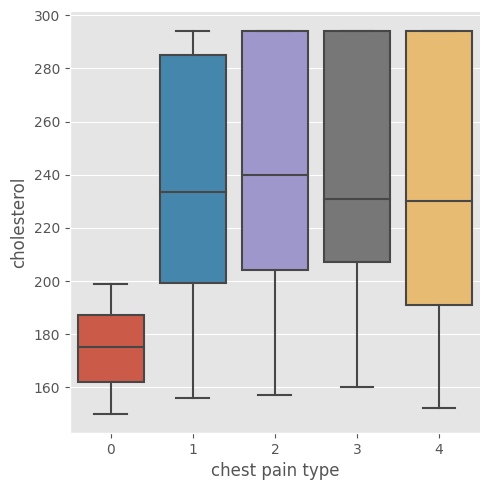

In [48]:
sns.catplot(data=df, x='chest pain type', y='cholesterol', kind='box');

Cholesterol and exericise angina has a 0.4 pearson correlation between them.

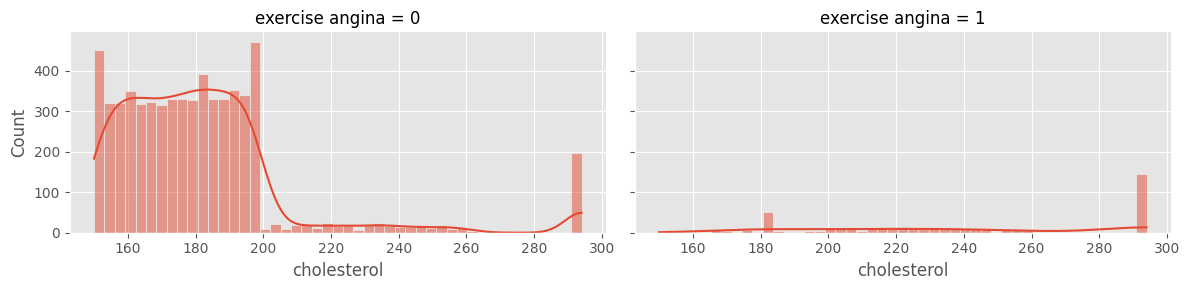

In [49]:
sns.displot(data=df, x='cholesterol', col='exercise angina', kde=True, height=3, aspect=2);

#### Checking for outliers

In [50]:
plt.rcParams["figure.figsize"] = (6, 2)

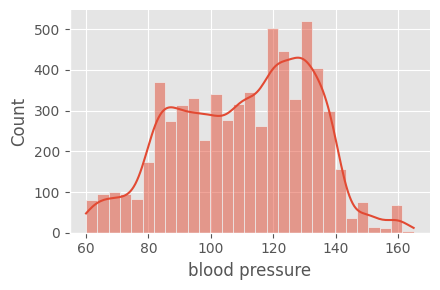

In [51]:
sns.displot(data=df, x='blood pressure', kde=True, height=3, aspect=1.5);

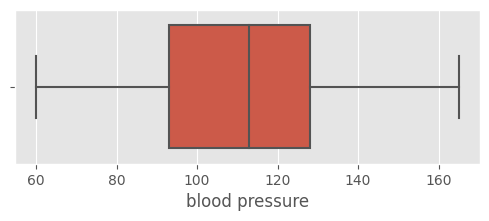

In [52]:
sns.boxplot(data=df, x='blood pressure');

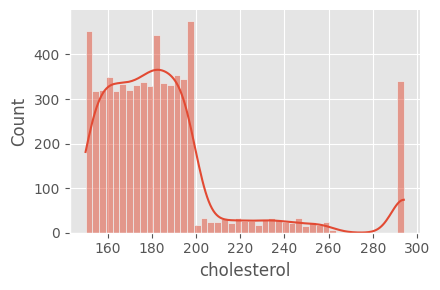

In [53]:
sns.displot(data=df, x='cholesterol', kde=True, height=3, aspect=1.5);

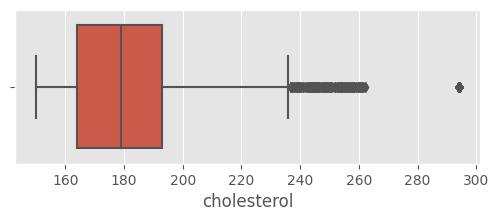

In [54]:
sns.boxplot(data=df, x='cholesterol');

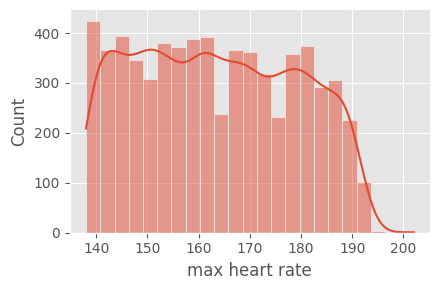

In [55]:
sns.displot(data=df, x='max heart rate', kde=True, height=3, aspect=1.5);

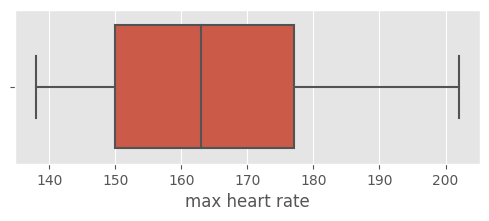

In [56]:
sns.boxplot(data=df, x='max heart rate');

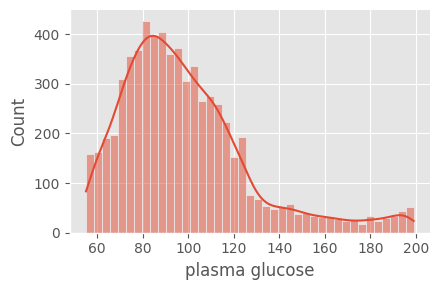

In [57]:
sns.displot(data=df, x='plasma glucose', kde=True, height=3, aspect=1.5);

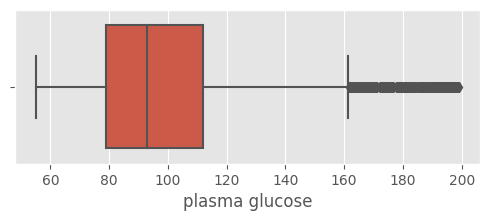

In [58]:
sns.boxplot(data=df, x='plasma glucose');

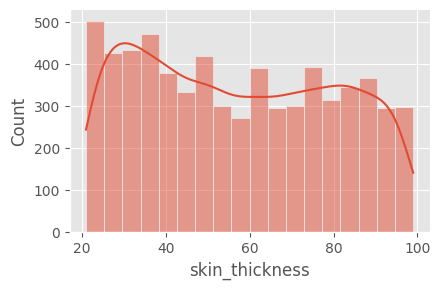

In [59]:
sns.displot(data=df, x='skin_thickness', kde=True, height=3, aspect=1.5);

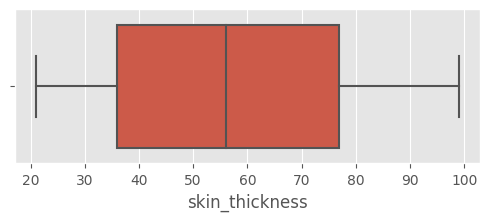

In [60]:
sns.boxplot(data=df, x='skin_thickness');

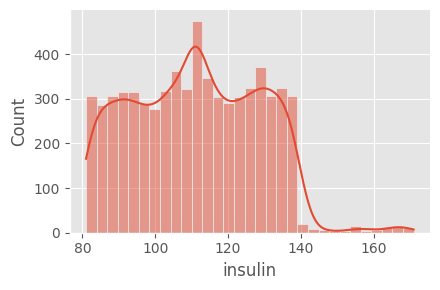

In [61]:
sns.displot(data=df, x='insulin', kde=True, height=3, aspect=1.5);

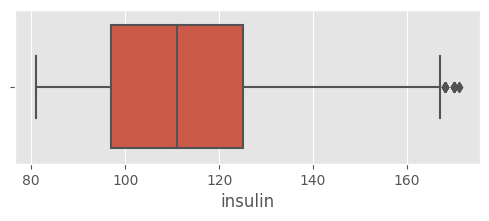

In [62]:
sns.boxplot(data=df, x='insulin');

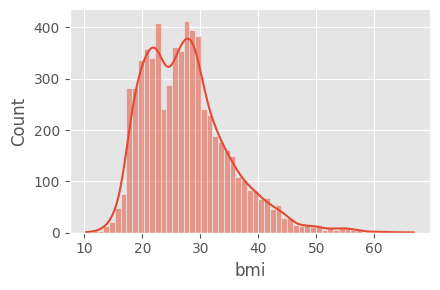

In [63]:
sns.displot(data=df, x='bmi', kde=True, height=3, aspect=1.5);

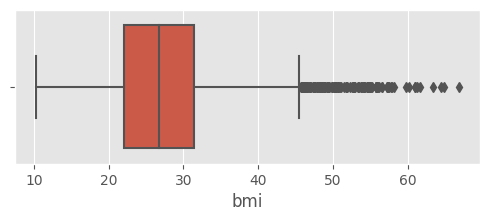

In [64]:
sns.boxplot(data=df, x='bmi');

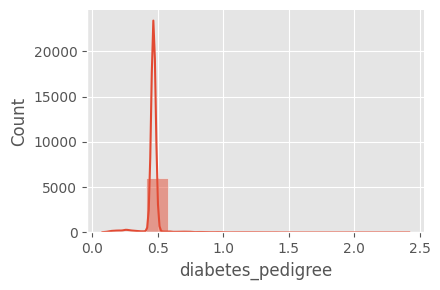

In [65]:
sns.displot(data=df, x='diabetes_pedigree', kde=True, height=3, aspect=1.5);

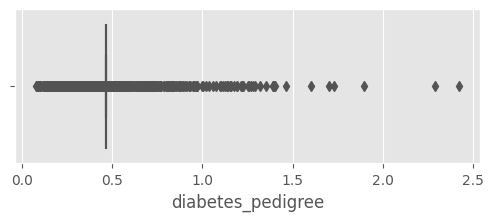

In [66]:
sns.boxplot(data=df, x='diabetes_pedigree');

As we can see, we've got outliers for the below columns.
- cholesterol
- plasma glucose
- insulin
- bmi

In [67]:
# handling outliers
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Currently removing: {}'.format(col))
        mean = df[col].mean()
        sd = df[col].std()
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

In [68]:
df.shape

(6551, 17)

In [69]:
columns = ['cholesterol', 'plasma glucose', 'insulin', 'bmi']
n_std = 3 # Three standard deviations away from the mean to differentiate outlier from non-outlier.

In [70]:
filtered_df = remove_outliers(df,columns,n_std)

Currently removing: cholesterol
Currently removing: plasma glucose
Currently removing: insulin
Currently removing: bmi


In [71]:
filtered_df.shape

(5959, 17)

In [72]:
filtered_df.reset_index(inplace=True)

In [73]:
filtered_df

,index,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type,smoking_status,triage
0,1,49,0,3,160,180,156,0,75.00,47,90,18.0,0.467386,0,0,1,never smoked,orange
1,3,48,0,4,138,214,156,1,72.00,51,118,18.0,0.467386,0,0,1,never smoked,orange
2,4,54,1,3,150,195,156,0,108.00,90,83,21.0,0.467386,0,0,1,never smoked,yellow
3,6,45,0,2,130,237,170,0,116.00,39,97,23.0,0.467386,0,0,1,never smoked,yellow
4,7,54,1,2,110,208,142,0,124.00,82,103,19.0,0.467386,0,0,1,never smoked,yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5954,6546,80,0,0,111,153,166,0,83.75,31,108,18.6,0.467386,1,0,1,never smoked,yellow
5955,6547,81,0,0,123,157,160,0,125.20,23,89,40.0,0.467386,0,0,1,never smoked,yellow
5956,6548,81,0,0,127,185,141,0,82.99,41,95,30.6,0.467386,0,0,0,never smoked,yellow
5957,6549,51,1,0,123,161,162,0,166.29,34,93,25.6,0.467386,0,0,0,formerly smoked,green


#### One hot encoding for smoking status

In [74]:
filtered_df['smoking_status'] = filtered_df['smoking_status'].astype('category')

In [75]:
ohe = pd.get_dummies(filtered_df.smoking_status, prefix='smoking_status')

In [76]:
filtered_df = filtered_df.join(ohe)

In [77]:
drop_cols = ['smoking_status', 'index', 'smoking_status_Unknown']

In [78]:
filtered_df.drop(drop_cols, axis=1, inplace=True)

In [79]:
filtered_df.columns

Index(['age', 'gender', 'chest pain type', 'blood pressure', 'cholesterol',
       'max heart rate', 'exercise angina', 'plasma glucose', 'skin_thickness',
       'insulin', 'bmi', 'diabetes_pedigree', 'hypertension', 'heart_disease',
       'Residence_type', 'triage', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [80]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5959 entries, 0 to 5958
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5959 non-null   int32  
 1   gender                          5959 non-null   int32  
 2   chest pain type                 5959 non-null   int32  
 3   blood pressure                  5959 non-null   int32  
 4   cholesterol                     5959 non-null   int32  
 5   max heart rate                  5959 non-null   int32  
 6   exercise angina                 5959 non-null   int32  
 7   plasma glucose                  5959 non-null   float64
 8   skin_thickness                  5959 non-null   int32  
 9   insulin                         5959 non-null   int32  
 10  bmi                             5959 non-null   float64
 11  diabetes_pedigree               5959 non-null   float64
 12  hypertension                    59

#### End of Feature engineering

### Preparation for Classification:
Below are the parameters that needs to be taken into account:
- Multiclass classification problem
- Imbalanced dataset

Preparing X and y

In [81]:
target_names = filtered_df['triage'].unique()

In [82]:
X, y = filtered_df.drop(columns = ['triage'], axis=1).copy(), filtered_df['triage']

In [83]:
X_names = X.columns
y_name = y.name

In [84]:
target_names

array(['orange', 'yellow', 'red', 'green'], dtype=object)

In [85]:
feature_list = list(X.columns)

### Splitting data in Train, Validation and Test

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
# We want to split the data in train:valid:test dataset

train_size=0.33

In [88]:
# In the first step we will split the data in training and remaining dataset

X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=train_size, random_state=17)

In [89]:
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=test_size, random_state=17)

In [90]:
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(1966, 18)
(1966,)
(1996, 18)
(1996,)
(1997, 18)
(1997,)


(None, None)

### Cross Validation and Model Selection

Using 3 best fit classifier models according to the case here to check the initial accuracy on training data.
- DecisionTree
- RandomForest
- LGBM

In [91]:
#Splitting the data into a train and validation set
#Model Score using KFold
#The folds are made by preserving the percentages of samples for each class

from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

count = 1
#we use split method that will generate indices to split data into train and test sets

for train_index, test_index in skf.split(X_train, y_train):
    print(f'Fold:{count}, Train set: {len(train_index)},Test set:{len(test_index)}')
    count+=1

Fold:1, Train set: 1572,Test set:394
Fold:2, Train set: 1573,Test set:393
Fold:3, Train set: 1573,Test set:393
Fold:4, Train set: 1573,Test set:393
Fold:5, Train set: 1573,Test set:393


In [92]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#### Random Forest

In [93]:
score = cross_val_score(RandomForestClassifier(random_state=17), 
                        X_train, y_train, cv=skf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.99746193 0.99236641 0.99745547 0.98982188 0.99236641]
Average score: 0.99


#### LGBM Classifier

In [94]:
score = cross_val_score(LGBMClassifier(random_state=17), 
                        X_train, y_train, cv=skf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.99492386 1.         0.99745547 0.99491094 1.        ]
Average score: 1.00


We can proceed with Light GBM or Random Forest here. We could've also used Decision Tree but if we're going with a tree based model, it's safer to use a model that uses Ensemble learning.

### Random Forest approach

In [95]:
#Instantiate model with decision trees
rf = RandomForestClassifier()

# Train the model using the training data
rf.fit(X_train, y_train)

RandomForestClassifier()

In [96]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

In [97]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [98]:
rf_params = {'n_estimators': np.array([400, 450, 500, 550, 600, 650, 700, 750]),\
             'max_depth': np.arange(4, 12),\
             'random_state' : [17]}

In [99]:
grid_rf = GridSearchCV(estimator=rf, param_grid=rf_params, cv=skf, n_jobs=-1, verbose=1)

In [100]:
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11]),
                         'n_estimators': array([400, 450, 500, 550, 600, 650, 700, 750]),
                         'random_state': [17]},
             verbose=1)

In [101]:
#Predictions on validation
predictions_rf = grid_rf.predict(X_valid)

Training Score

In [102]:
score = grid_rf.score(X_train, y_train)

In [103]:
print(round((score*100), 2),'%')

100.0 %


In [104]:
print(grid_rf.best_estimator_)

RandomForestClassifier(max_depth=10, n_estimators=500, random_state=17)


In [105]:
## Classification report for Random Forest Classifier

from sklearn.metrics import classification_report
print(classification_report(y_valid, predictions_rf, target_names=target_names))

              precision    recall  f1-score   support

      orange       1.00      0.98      0.99        92
      yellow       0.90      1.00      0.95       101
         red       1.00      0.73      0.85        45
       green       1.00      1.00      1.00      1758

    accuracy                           0.99      1996
   macro avg       0.97      0.93      0.95      1996
weighted avg       0.99      0.99      0.99      1996



#### Getting Feature importances

In [106]:
#Get numerical feature importances
importances = list(rf.feature_importances_)

#List of tupples with variable and importance

feature_importances = [(X_train, round(importance, 2)) for X_train,
                      importance in zip(feature_list, importances)]


#Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], 
                            reverse = False)

In [107]:
plt.rcParams["figure.figsize"] = (20, 10)

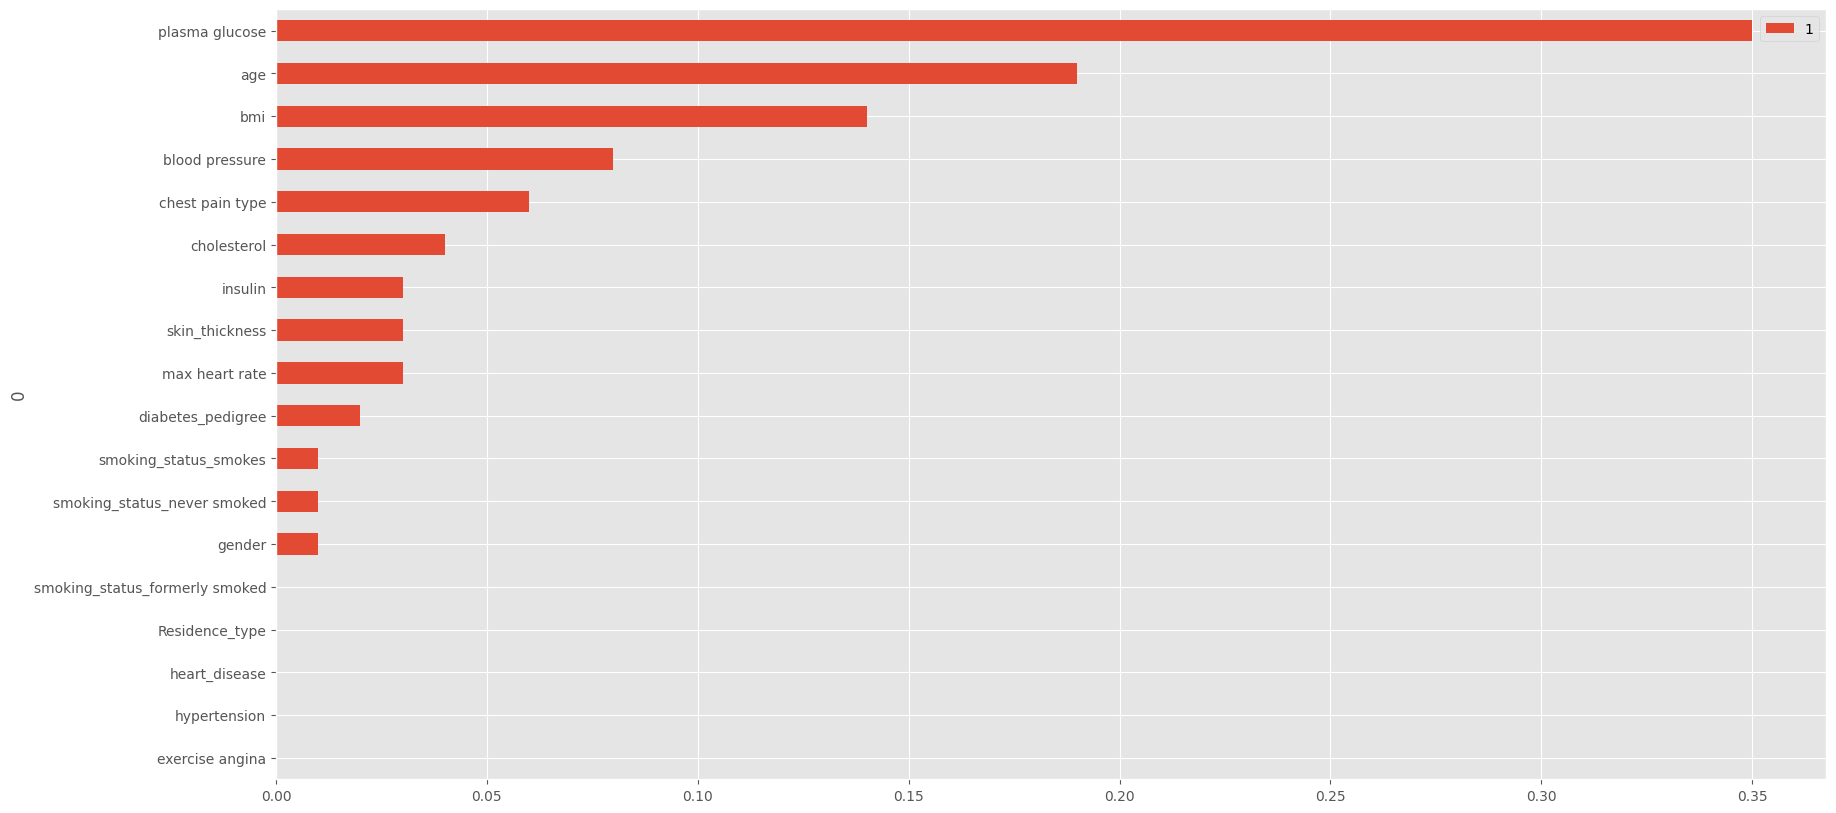

In [108]:
pd.DataFrame(feature_importances).plot.barh(x=0);

### Light GBM approach

In [109]:
lgbc = LGBMClassifier()

In [110]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [111]:
lgb_parms = {'learning_rate': [0.005, 0.05, 0.02, 0.01],\
            'n_estimators': [32, 40, 48, 56, 64, 72, 80, 88, 96],\
            'min_data_in_leaf' : [10],\
            'num_leaves': [2, 4, 6, 8],\
            'boosting_type' : ['gbdt', 'dart'],\
            'objective' : ['multiclass'],\
            'random_state' : [17]}

In [112]:
grid_lgb = GridSearchCV(lgbc, lgb_parms, verbose=1, cv=skf, n_jobs=-1)

In [113]:
grid_lgb.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
             estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'learning_rate': [0.005, 0.05, 0.02, 0.01],
                         'min_data_in_leaf': [10],
                         'n_estimators': [32, 40, 48, 56, 64, 72, 80, 88, 96],
                         'num_leaves': [2, 4, 6, 8],
                         'objective': ['multiclass'], 'random_state': [17]},
             verbose=1)

In [114]:
print(grid_lgb.best_params_)

{'boosting_type': 'gbdt', 'learning_rate': 0.05, 'min_data_in_leaf': 10, 'n_estimators': 64, 'num_leaves': 6, 'objective': 'multiclass', 'random_state': 17}


In [115]:
predictions_lgb = grid_lgb.predict(X_valid)

In [116]:
## Classification report for LGBM classifier

from sklearn.metrics import classification_report
print(classification_report(y_valid, predictions_lgb, target_names=target_names))

              precision    recall  f1-score   support

      orange       1.00      0.98      0.99        92
      yellow       0.99      1.00      1.00       101
         red       1.00      0.98      0.99        45
       green       1.00      1.00      1.00      1758

    accuracy                           1.00      1996
   macro avg       1.00      0.99      0.99      1996
weighted avg       1.00      1.00      1.00      1996



### Confusion metrics and overall performanec on Test Data

In [117]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [118]:
plt.rcParams["figure.figsize"] = (6, 4)

In [119]:
X_test.shape, y_test.shape

((1997, 18), (1997,))

### For Random Forest

In [120]:
# prediction on test split

y_pred_rf = grid_rf.predict(X_test)

In [121]:
ack = accuracy_score(y_test, y_pred_rf, normalize=True)
print(ack)

0.9944917376064096


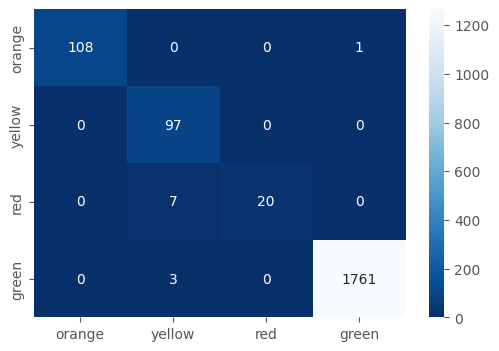

In [122]:
cf_mat_rf = confusion_matrix(y_test, y_pred_rf)

ax= plt.subplot()
sns.heatmap(cf_mat_rf, annot=True, fmt='g', ax=ax, robust=True, cmap = 'Blues_r');

ax.xaxis.set_ticklabels(target_names);
ax.yaxis.set_ticklabels(target_names);

### For Light GBM

In [123]:
# prediction on test split

y_pred_lgb = grid_lgb.predict(X_test)

In [124]:
ack = accuracy_score(y_test, y_pred_lgb, normalize=True)
print(ack)

0.9984977466199298


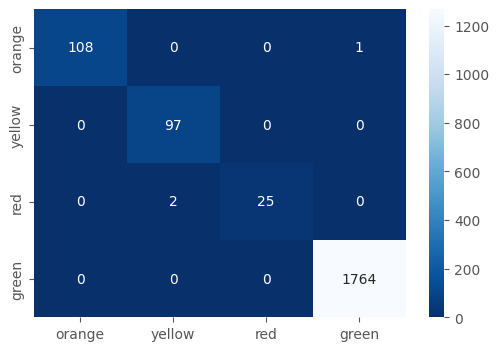

In [125]:
cf_mat_lgb = confusion_matrix(y_test, y_pred_lgb)

ax= plt.subplot()
sns.heatmap(cf_mat_lgb, annot=True, fmt='g', ax=ax, robust=True, cmap = 'Blues_r');

ax.xaxis.set_ticklabels(target_names);
ax.yaxis.set_ticklabels(target_names);